## Retos:


*   Realizar un modelo de predección con los datos orginales ¿Cuál es su error cuadrático medio?
*   Une los datos originales y , realiza un modelo de predección con los datos simulados ¿Cuál es su error cuadrático medio?
*   ¿Los datos simulados realizaron alguna contribución?

## Aplicación con dataset
# Consumo de energía eléctrica en hogares individuales
Mediciones del consumo de energía eléctrica en un hogar con una frecuencia de muestreo de un minuto durante un período de casi 4 años. Se encuentran disponibles diferentes magnitudes eléctricas y algunos valores de submedición.

In [1]:
# Importe de librerias
import pandas as pd

In [2]:
# abrir el archivo
# https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption
path = "C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/git_portafolio/Portafolio/data/"
df = pd.read_csv(path + 'household_power_consumption.txt', sep=';', low_memory=False)
df.head(3)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0


In [3]:
# Limpiar los datos y seleccionar una variable de interés (Global_active_power)
# Filtramos los datos no disponibles
df = df.dropna(subset=['Global_active_power'])

In [4]:
# Convertimos Global_active_power a float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
globalpower = df['Global_active_power']

In [5]:
# convertir date a tipo fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\delahozce\AppData\Local\Temp\ipykernel_13856\3621072184.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [6]:
# tipo de dato que es date
print(df['Date'].dtype)

datetime64[ns]


In [7]:
# agrupar por día
daily_data = df.groupby(df['Date'].dt.date)['Global_active_power'].sum()
print(daily_data.head())

Date
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Name: Global_active_power, dtype: float64


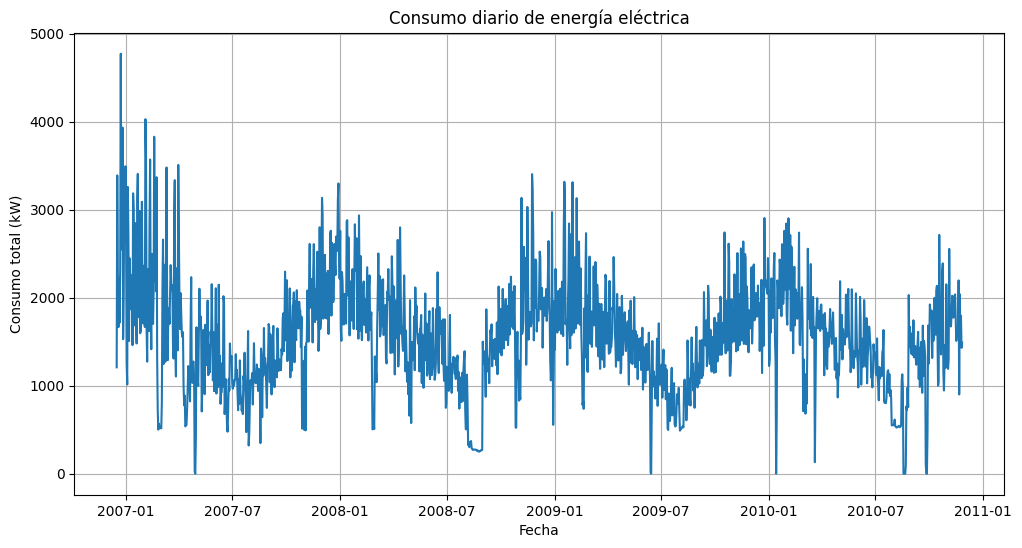

In [9]:
# prompt: graficar daily_data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.grid(True)
plt.show()

In [10]:
# Agrupo por la columna 'Date' y sumar la columna 'Global_active_power'
df_daily = df.groupby("Date", as_index=False)["Global_active_power"].sum()
df_daily.head()

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


### Creación de Modelo datos reales

In [11]:
# Preparar los datos para el modelo
X = df_daily['Date'].astype('int64').astype('float64') # Convertir fecha a timestamp
X = X.values.reshape(-1, 1) 
y = df_daily['Global_active_power']

In [12]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Crear y entrenar el modelo lineal
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)


LinearRegression()

In [14]:
# Crear y entrenar Modelo polinomial de grado 2
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)

LinearRegression()

In [15]:
# Realizar predicciones
y_pred_lineal = modelo_lineal.predict(X_test)
y_pred_poly = modelo_poly.predict(X_test_poly)

In [16]:
# Evaluar los modelos
from sklearn.metrics import mean_squared_error, r2_score

mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Modelo Lineal:")
print(f"Error cuadrático medio: {mse_lineal}")
print(f"R-cuadrado: {r2_lineal}")

print("\nModelo Polinomial:")
print(f"Error cuadrático medio: {mse_poly}")
print(f"R-cuadrado: {r2_poly}")

Modelo Lineal:
Error cuadrático medio: 407242.5378145865
R-cuadrado: 0.020731626828551453

Modelo Polinomial:
Error cuadrático medio: 407357.6309141505
R-cuadrado: 0.020454870296735983


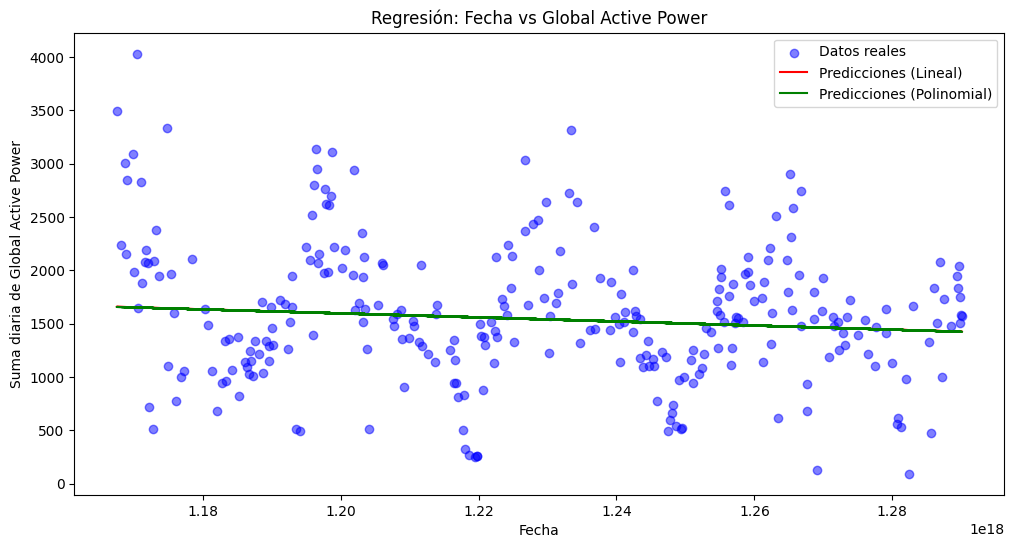

In [17]:
# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_test, y_pred_lineal, color='red', label='Predicciones (Lineal)')
plt.plot(X_test, y_pred_poly, color='green', label='Predicciones (Polinomial)')
plt.xlabel('Fecha')
plt.ylabel('Suma diaria de Global Active Power')
plt.title('Regresión: Fecha vs Global Active Power')
plt.legend()

In [18]:
# los coeficientes del modelo lineal
print("\nModelo Lineal:")
print(f"Intercepto: {modelo_lineal.intercept_}")
print(f"Coeficiente: {modelo_lineal.coef_[0]}")

# los coeficientes del modelo polinomial
print("\nModelo Polinomial:")
print(f"Intercepto: {modelo_poly.intercept_}")
print(f"Coeficientes: {modelo_poly.coef_}")


Modelo Lineal:
Intercepto: 3879.2971567200852
Coeficiente: -1.9023109905484667e-15

Modelo Polinomial:
Intercepto: 2709.0343144441063
Coeficientes: [-3.14299816e-52 -7.72397803e-34]


### Modelo con datos reales y simulados

In [19]:
# Análisis preliminar
# Revisamos estadísticas clave de consumo de energía
mean_consumption = df_daily['Global_active_power'].mean()  # Media
std_consumption = df_daily['Global_active_power'].std()    # Desviación estándar
print(f"Media del consumo de energía: {mean_consumption} kW")
print(f"Desviación estándar del consumo de energía: {std_consumption} kW")


Media del consumo de energía: 1551.3348557558943 kW
Desviación estándar del consumo de energía: 617.2971174379429 kW


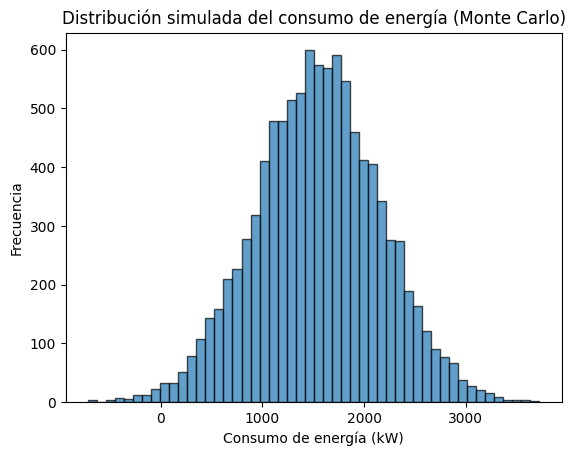

In [20]:
# Definir la simulación Monte Carlo
import numpy as np
# Vamos a simular 10000 escenarios de consumo de energía futura
num_simulations = 10000
# Simulamos escenarios de consumo basado en una distribución normal
simulated_consumption = np.random.normal(loc=mean_consumption, scale=std_consumption, size=num_simulations)

# Visualizar los resultados
plt.hist(simulated_consumption, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución simulada del consumo de energía (Monte Carlo)')
plt.xlabel('Consumo de energía (kW)')
plt.ylabel('Frecuencia')
plt.show()

In [21]:
# imprime el dataset con los datos simulados, convierte en dataset y coloca fechas
from datetime import date, datetime, timedelta

start_date = df_daily["Date"].max() + timedelta(days=1)  # Empezar desde el día siguiente al último del dataset original
end_date = start_date + timedelta(days=len(simulated_consumption) - 1)
date_range = pd.date_range(start=start_date, end=end_date)

# Crear el nuevo DataFrame
df_simulated = pd.DataFrame({'Date': date_range, 'Global_active_power': simulated_consumption})

df_simulated.head(3)

,Date,Global_active_power
0,2010-11-27,1401.004157
1,2010-11-28,650.896183
2,2010-11-29,1769.932778


In [22]:
# Unión datos reales y simulados
df_all = pd.concat([df_daily, df_simulated], axis=0, ignore_index=True)

print(df_all.shape)
df_all.head(2)

(11442, 2)


,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460


In [23]:
# Preparar los datos para el modelo
X1 = df_all['Date'].astype('int64').astype('float64') # Convertir fecha a timestamp
X1 = X1.values.reshape(-1, 1) 
y1 = df_all['Global_active_power']

In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [25]:
# Crear y entrenar el modelo lineal
from sklearn.linear_model import LinearRegression

modelo_lineal1 = LinearRegression()
modelo_lineal1.fit(X_train1, y_train1)

LinearRegression()

In [26]:
# Crear y entrenar Modelo polinomial de grado 2
from sklearn.preprocessing import PolynomialFeatures

poly_features1 = PolynomialFeatures(degree=2, include_bias=False)
X_poly1 = poly_features1.fit_transform(X1)
X_train_poly1, X_test_poly1, y_train1, y_test1 = train_test_split(X_poly1, y1, test_size=0.2, random_state=42)

modelo_poly1 = LinearRegression()
modelo_poly1.fit(X_train_poly1, y_train1)

LinearRegression()

In [27]:
# Realizar predicciones
y_pred_lineal1 = modelo_lineal1.predict(X_test1)
y_pred_poly1 = modelo_poly1.predict(X_test_poly1)

In [28]:
# Evaluar los modelos
from sklearn.metrics import mean_squared_error, r2_score

mse_lineal1 = mean_squared_error(y_test1, y_pred_lineal1)
r2_lineal1 = r2_score(y_test1, y_pred_lineal1)

mse_poly1 = mean_squared_error(y_test1, y_pred_poly1)
r2_poly1 = r2_score(y_test1, y_pred_poly1)

print("Modelo Lineal:")
print(f"Error cuadrático medio: {mse_lineal1}")
print(f"R-cuadrado: {r2_lineal1}")

print("\nModelo Polinomial:")
print(f"Error cuadrático medio: {mse_poly1}")
print(f"R-cuadrado: {r2_poly1}")

Modelo Lineal:
Error cuadrático medio: 393404.9185138908
R-cuadrado: -0.00494782278371475

Modelo Polinomial:
Error cuadrático medio: 393396.32647805806
R-cuadrado: -0.004925874538288744


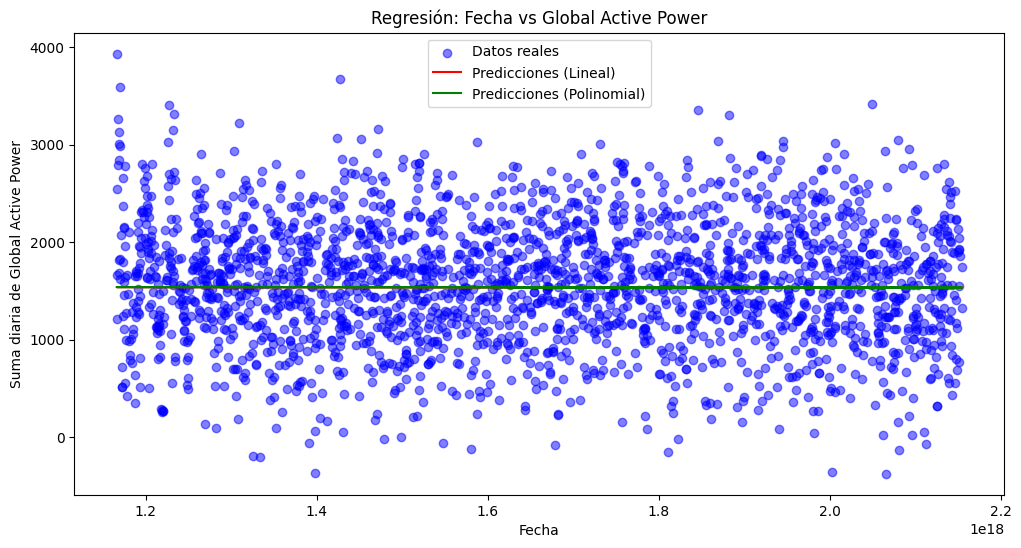

In [29]:
# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(X_test1, y_test1, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_test1, y_pred_lineal1, color='red', label='Predicciones (Lineal)')
plt.plot(X_test1, y_pred_poly1, color='green', label='Predicciones (Polinomial)')
plt.xlabel('Fecha')
plt.ylabel('Suma diaria de Global Active Power')
plt.title('Regresión: Fecha vs Global Active Power')
plt.legend()

In [30]:
# los coeficientes del modelo lineal
print("\nModelo Lineal:")
print(f"Intercepto: {modelo_lineal1.intercept_}")
print(f"Coeficiente: {modelo_lineal1.coef_[0]}")

# los coeficientes del modelo polinomial
print("\nModelo Polinomial:")
print(f"Intercepto: {modelo_poly1.intercept_}")
print(f"Coeficientes: {modelo_poly1.coef_}")


Modelo Lineal:
Intercepto: 1543.7214575082194
Coeficiente: -3.646924151524525e-18

Modelo Polinomial:
Intercepto: 1541.4820198205407
Coeficientes: [-4.02275409e-55 -1.34397324e-36]


### Compración Modelos

In [33]:
import pandas as pd

# Crear un DataFrame con las métricas
metrics = pd.DataFrame({
    'Modelo': ['Lineal (Real)', 'Lineal (Real + Simulado)', 'Polinomial (Real)', 'Polinomial (Real + Simulado)'],
    'MSE': [mse_lineal, mse_lineal1, mse_poly, mse_poly1],
    'R2': [r2_lineal, r2_lineal1, r2_poly, r2_poly1]
})

print(metrics)

# Calcular las mejoras porcentuales
improvement_mse_linear = (mse_lineal - mse_lineal1) / mse_lineal * 100
improvement_r2_linear = (r2_lineal1 - r2_lineal) / r2_lineal * 100
improvement_mse_poly = (mse_poly - mse_poly1) / mse_poly * 100
improvement_r2_poly = (r2_poly1 - r2_poly) / r2_poly * 100

print("\nMejoras porcentuales:")
print(f"Modelo Lineal - Mejora en MSE: {improvement_mse_linear:.2f}%")
print(f"Modelo Lineal - Mejora en R2: {improvement_r2_linear:.2f}%")
print(f"Modelo Polinomial - Mejora en MSE: {improvement_mse_poly:.2f}%")
print(f"Modelo Polinomial - Mejora en R2: {improvement_r2_poly:.2f}%")

# Identificar el mejor modelo
best_model = metrics.loc[metrics['R2'].idxmax()]
print(f"\nMejor modelo basado en R2: {best_model['Modelo']}")
print(f"R2 del mejor modelo: {best_model['R2']:.4f}")
print(f"MSE del mejor modelo: {best_model['MSE']:.4f}")

                         Modelo            MSE        R2
0                 Lineal (Real)  407242.537815  0.020732
1      Lineal (Real + Simulado)  393404.918514 -0.004948
2             Polinomial (Real)  407357.630914  0.020455
3  Polinomial (Real + Simulado)  393396.326478 -0.004926

Mejoras porcentuales:
Modelo Lineal - Mejora en MSE: 3.40%
Modelo Lineal - Mejora en R2: -123.87%
Modelo Polinomial - Mejora en MSE: 3.43%
Modelo Polinomial - Mejora en R2: -124.08%

Mejor modelo basado en R2: Lineal (Real)
R2 del mejor modelo: 0.0207
MSE del mejor modelo: 407242.5378


In [32]:
# Evaluar los modelos
mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

mse_lineal1 = mean_squared_error(y_test1, y_pred_lineal1)
r2_lineal1 = r2_score(y_test1, y_pred_lineal1)

print("Modelo Lineal (Real):")
print(f"Error cuadrático medio: {mse_lineal}")
print(f"R-cuadrado: {r2_lineal}")

print("\nModelo Lineal (Real + Simulado):")
print(f"Error cuadrático medio: {mse_lineal1}")
print(f"R-cuadrado: {r2_lineal1}")

#----------
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mse_poly1 = mean_squared_error(y_test1, y_pred_poly1)
r2_poly1 = r2_score(y_test1, y_pred_poly1)


print("\nModelo Polinomial (Real):")
print(f"Error cuadrático medio: {mse_poly}")
print(f"R-cuadrado: {r2_poly}")

print("\nModelo Polinomial (Real + Simulado):")
print(f"Error cuadrático medio: {mse_poly1}")
print(f"R-cuadrado: {r2_poly1}")

Modelo Lineal (Real):
Error cuadrático medio: 407242.5378145865
R-cuadrado: 0.020731626828551453

Modelo Lineal (Real + Simulado):
Error cuadrático medio: 393404.9185138908
R-cuadrado: -0.00494782278371475

Modelo Polinomial (Real):
Error cuadrático medio: 407357.6309141505
R-cuadrado: 0.020454870296735983

Modelo Polinomial (Real + Simulado):
Error cuadrático medio: 393396.32647805806
R-cuadrado: -0.004925874538288744


¿Los datos simulados realizaron alguna contribución?